In [20]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.ensemble import RandomForestClassifier

In [15]:
X, y = load_digits(return_X_y=True)

In [65]:
X.shape

(1797, 64)

In [64]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [33]:
image = X[0]

In [41]:
image

array([0.00, 0.00, 5.00, 13.00, 9.00, 1.00, 0.00, 0.00, 0.00, 0.00, 13.00,
       15.00, 10.00, 15.00, 5.00, 0.00, 0.00, 3.00, 15.00, 2.00, 0.00,
       11.00, 8.00, 0.00, 0.00, 4.00, 12.00, 0.00, 0.00, 8.00, 8.00, 0.00,
       0.00, 5.00, 8.00, 0.00, 0.00, 9.00, 8.00, 0.00, 0.00, 4.00, 11.00,
       0.00, 1.00, 12.00, 7.00, 0.00, 0.00, 2.00, 14.00, 5.00, 10.00,
       12.00, 0.00, 0.00, 0.00, 0.00, 6.00, 13.00, 10.00, 0.00, 0.00,
       0.00])

In [48]:
image = image.reshape((8, 8))

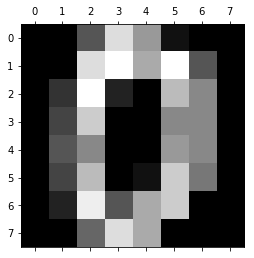

In [43]:
plt.matshow(image, cmap = 'gray')

In [92]:
U, s, V = np.linalg.svd(image)

S = np.zeros((image.shape[0], image.shape[1]))

S[:image.shape[0], :image.shape[0]] = np.diag(s)

n_components = 2

S = S[:, :n_components]
VT = VT[:n_components, :]

A = U.dot(Sigma.dot(VT))

print(A)

[[0.00 -1.10 4.74 12.16 9.52 2.44 -1.33 0.00]
 [0.00 1.81 15.31 13.79 11.23 12.27 4.48 0.00]
 [0.00 3.86 13.36 1.19 1.49 12.59 7.65 0.00]
 [0.00 3.39 10.76 -0.35 0.20 10.36 6.61 0.00]
 [0.00 3.11 9.52 -0.85 -0.24 9.26 6.04 0.00]
 [0.00 3.61 11.79 0.12 0.60 11.27 7.07 0.00]
 [0.00 2.08 12.63 8.58 7.13 10.60 4.66 0.00]
 [0.00 -1.18 4.88 12.71 9.96 2.47 -1.44 0.00]]


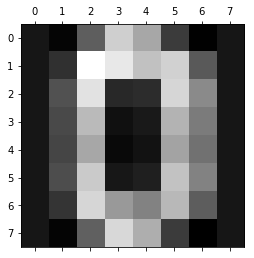

In [94]:
plt.matshow(A, cmap = 'gray')

In [95]:
U.dot(S)

array([[10.97, -12.23],
       [26.04, -6.82],
       [18.73, 7.95],
       [14.60, 8.08],
       [12.72, 7.84],
       [16.19, 8.21],
       [20.45, -2.05],
       [11.36, -12.85]])

In [66]:
rf_original = RandomForestClassifier(oob_score=True)

In [67]:
rf_original.fit(X, y)

/Users/cmaklin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/cmaklin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/cmaklin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/cmaklin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [68]:
rf_original.oob_score_

0.8603227601558152

In [69]:
svd = TruncatedSVD(n_components=2)

In [70]:
X_reduced = svd.fit_transform(X)

In [75]:
X_reduced[0]

array([45.86, -1.19])

In [80]:
image_reduced = svd.inverse_transform(X_reduced[0].reshape(1,-1))

In [84]:
image_reduced = image_reduced.reshape((8,8))

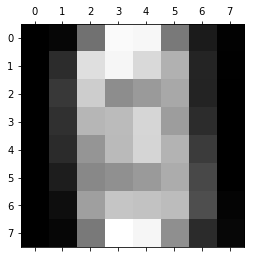

In [85]:
plt.matshow(image_reduced, cmap = 'gray')

In [76]:
rf_reduced = RandomForestClassifier(oob_score=True)

In [77]:
rf_reduced.fit(X_reduced, y)

/Users/cmaklin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/cmaklin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/cmaklin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/cmaklin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [74]:
rf_reduced.oob_score_

0.36672231496939345

In [87]:
svd.explained_variance_ratio_.sum()

0.17760900862040058

In [90]:
svd = TruncatedSVD(n_components=16)

X_reduced = svd.fit_transform(X)

svd.explained_variance_ratio_.sum()

0.8479578256047824

In [91]:
rf_reduced = RandomForestClassifier(oob_score=True)

rf_reduced.fit(X_reduced, y)

rf_reduced.oob_score_

/Users/cmaklin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/cmaklin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/cmaklin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/cmaklin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8647746243739566